# Regressions - The Ultimate Notebook

### Imports

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### The Dataset

In [2]:
df = pd.read_csv("regression.csv", low_memory=True, sep=";")

In [3]:
#display(df)

## 1) autosklearn Regression

[(1.000000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'select_rates_regression', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.019566163649872924, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7200608810425068, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.22968043330398744, 'feature_preprocessor:select_rates_regression:alpha': 0.18539282936320728, 'feature_preprocessor:select_rates_regression:mode': 'fwe', 'feature_preprocessor:select_rates_regression:score

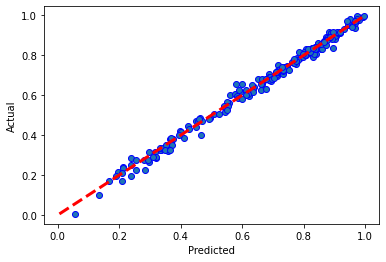

Histogram Errors :


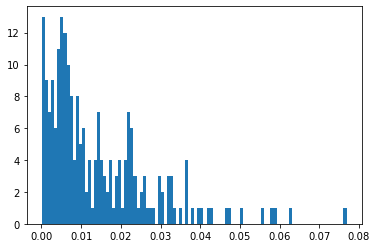

In [6]:
import autosklearn.regression

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task = 300, ensemble_size=1)
automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)

print(automl.show_models())
print("------------------------------------------------------")
print(automl.sprint_statistics())
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("------------------------------------------------------")
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("------------------------------------------------------")
print("Max Error: ", max_error(y_test, y_pred))
print("------------------------------------------------------")
print("")
print("Actual vs Predicted:")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

print("Histogram Errors :")
err_hist = np.abs(y_test - y_pred)
plt.hist(err_hist, bins=100)
plt.show()

## 2) Linear Regression

------------------------------------------------------
R2: 0.9958265011299011
------------------------------------------------------
MAE (Median Absolute Error):  0.00812606832501156
------------------------------------------------------
MAE (Mean Absolute Error):  0.011222453102923125
MAPE (Mean Absolute Percentage Error):  0.038695546533140994
------------------------------------------------------
MSE (Mean Square Error):  0.00022178377288996142
RMSE (Root Mean Square Error):  0.014892406551325458
------------------------------------------------------
Max Error:  0.054027383092299375
------------------------------------------------------
Actual vs Predicted :


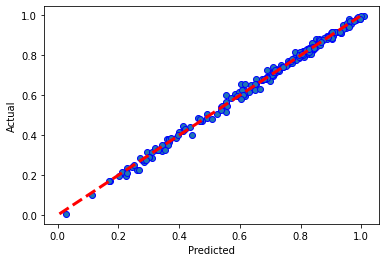

Histogram Errors :


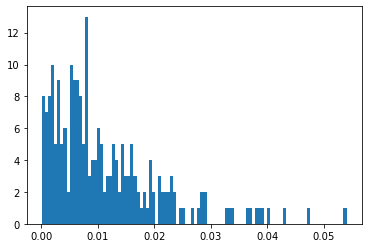

In [15]:
from sklearn.linear_model import LinearRegression

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("------------------------------------------------------")
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("------------------------------------------------------")
print("Max Error: ", max_error(y_test, y_pred))
print("------------------------------------------------------")
print("Actual vs Predicted :")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

print("Histogram Errors :")
err_hist = np.abs(y_test - y_pred)
plt.hist(err_hist, bins=100)
plt.show()

## 3) K-NN

------------------------------------------------------
For k = 1
R2: 0.9355501614110597
MAE (Median Absolute Error):  0.03490845700000006
MAE (Mean Absolute Error):  0.04360880615909091
MAPE (Mean Absolute Percentage Error):  0.09250087226436643
MSE (Mean Square Error):  0.0034249268561717897
RMSE (Root Mean Square Error):  0.05852287464036426
Max Error:  0.21183690899999996

Actual vs Predicted:


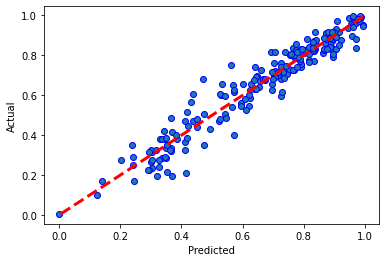

Histogram Errors :


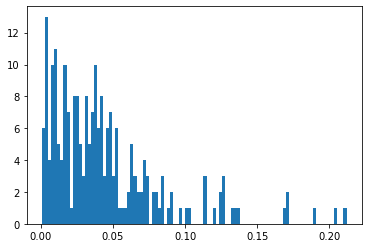

------------------------------------------------------
For k = 2
R2: 0.9482846569780549
MAE (Median Absolute Error):  0.029403777500000006
MAE (Mean Absolute Error):  0.039407883445454546
MAPE (Mean Absolute Percentage Error):  0.10573574657645234
MSE (Mean Square Error):  0.002748203425638844
RMSE (Root Mean Square Error):  0.05242330994547029
Max Error:  0.21121544749999993

Actual vs Predicted:


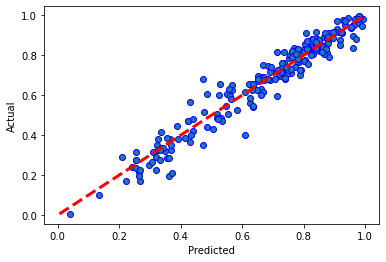

Histogram Errors :


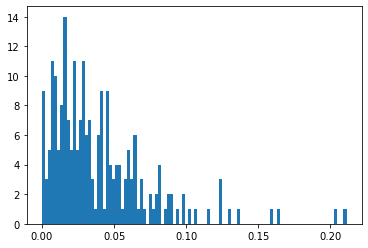

------------------------------------------------------
For k = 3
R2: 0.9521955315089711
MAE (Median Absolute Error):  0.028172644000000024
MAE (Mean Absolute Error):  0.03754690815909092
MAPE (Mean Absolute Percentage Error):  0.0919166307239208
MSE (Mean Square Error):  0.002540375764541309
RMSE (Root Mean Square Error):  0.0504021404757904
Max Error:  0.19503226266666657

Actual vs Predicted:


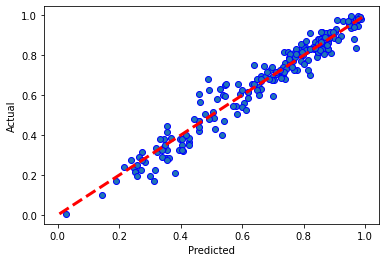

Histogram Errors :


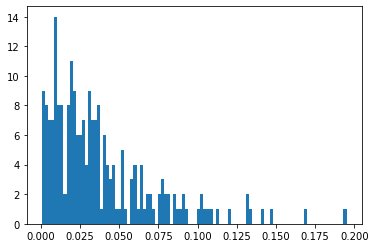

------------------------------------------------------
For k = 4
R2: 0.9545834140826575
MAE (Median Absolute Error):  0.028004948125000095
MAE (Mean Absolute Error):  0.03710557792386364
MAPE (Mean Absolute Percentage Error):  0.13297538849776086
MSE (Mean Square Error):  0.002413481371396835
RMSE (Root Mean Square Error):  0.04912719584300365
Max Error:  0.18439320874999993

Actual vs Predicted:


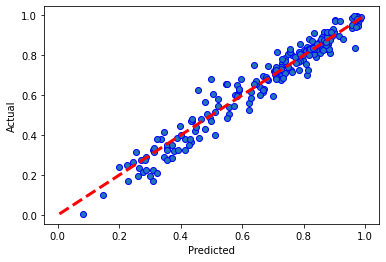

Histogram Errors :


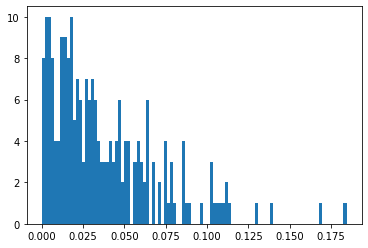

------------------------------------------------------
For k = 5
R2: 0.9528107216826125
MAE (Median Absolute Error):  0.02737907189999994
MAE (Mean Absolute Error):  0.0362090656709091
MAPE (Mean Absolute Percentage Error):  0.1496853841762364
MSE (Mean Square Error):  0.00250768396276977
RMSE (Root Mean Square Error):  0.0500767806749772
Max Error:  0.17833093199999994

Actual vs Predicted:


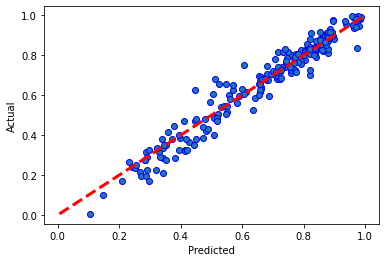

Histogram Errors :


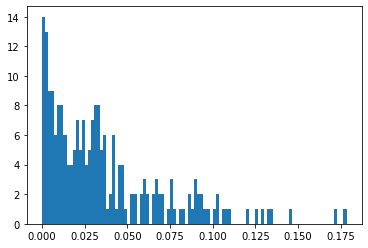

In [25]:
from sklearn.neighbors import KNeighborsRegressor

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

for k in range(1,6):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("For k =", k)
    print("R2:",r2_score(y_test, y_pred))
    print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
    print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
    print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
    print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
    print("Max Error: ", max_error(y_test, y_pred))
    print("")
    print("Actual vs Predicted:")
    fig, ax = plt.subplots()
    ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    print("Histogram Errors :")
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=100)
    plt.show()

## 4) Random Forest

------------------------------------------------------
For max_depth= 5
R2: 0.9923130837330331
MAE (Median Absolute Error):  0.010237067758334772
MAE (Mean Absolute Error):  0.014522412888944982
MAPE (Mean Absolute Percentage Error):  0.07730289817025011
MSE (Mean Square Error):  0.00040849017686130654
RMSE (Root Mean Square Error):  0.0202111399198884
Max Error:  0.07435305070456374

Actual vs Predicted:


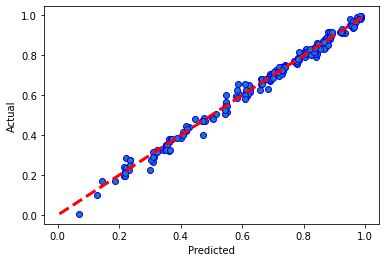

Histogram Errors :


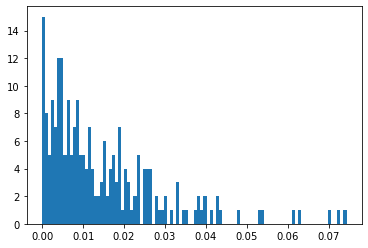

------------------------------------------------------
For max_depth= 10
R2: 0.9931787131954362
MAE (Median Absolute Error):  0.010003690590023678
MAE (Mean Absolute Error):  0.01353558875774898
MAPE (Mean Absolute Percentage Error):  0.06943372078764228
MSE (Mean Square Error):  0.00036248978868055746
RMSE (Root Mean Square Error):  0.01903916460038511
Max Error:  0.07615297410871402

Actual vs Predicted:


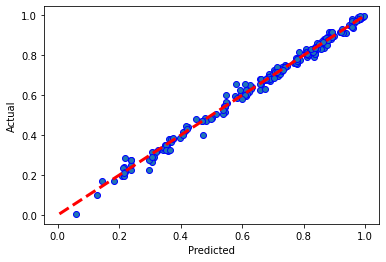

Histogram Errors :


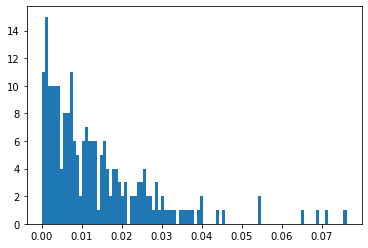

------------------------------------------------------
For max_depth= 20
R2: 0.9932380137269906
MAE (Median Absolute Error):  0.009663342144999781
MAE (Mean Absolute Error):  0.013457176622045522
MAPE (Mean Absolute Percentage Error):  0.0693013820515148
MSE (Mean Square Error):  0.00035933850098841336
RMSE (Root Mean Square Error):  0.018956225916263326
Max Error:  0.07471811559999986

Actual vs Predicted:


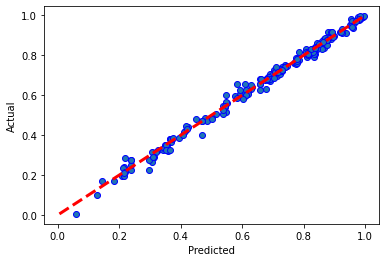

Histogram Errors :


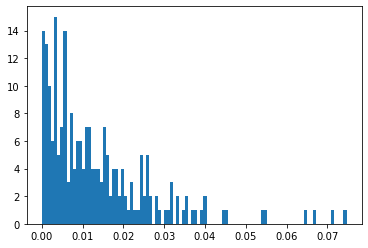

------------------------------------------------------
For max_depth= 100
R2: 0.9932380137269906
MAE (Median Absolute Error):  0.009663342144999781
MAE (Mean Absolute Error):  0.013457176622045522
MAPE (Mean Absolute Percentage Error):  0.0693013820515148
MSE (Mean Square Error):  0.00035933850098841336
RMSE (Root Mean Square Error):  0.018956225916263326
Max Error:  0.07471811559999986

Actual vs Predicted:


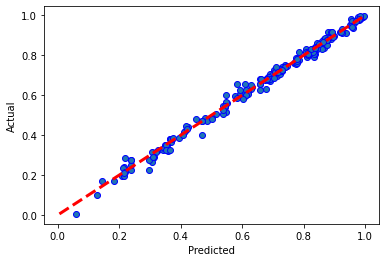

Histogram Errors :


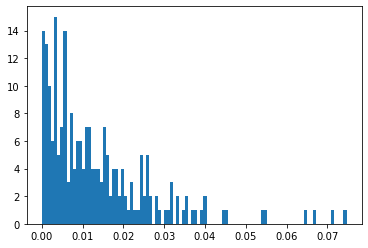

In [24]:
from sklearn.ensemble import RandomForestRegressor

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

for i in (5,10,20,100):
    model=RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("For max_depth=", i)
    print("R2:",r2_score(y_test, y_pred))
    print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
    print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
    print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
    print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
    print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
    print("Max Error: ", max_error(y_test, y_pred))
    print("")
    print("Actual vs Predicted:")
    fig, ax = plt.subplots()
    ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    print("Histogram Errors :")
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=100)
    plt.show()

## 5) LightGBM (LGBM)

------------------------------------------------------
R2: 0.991874151231744
------------------------------------------------------
MAE (Median Absolute Error):  0.009828976688244895
------------------------------------------------------
MAE (Mean Absolute Error):  0.013812518232942108
MAPE (Mean Absolute Percentage Error):  0.11847277266383804
------------------------------------------------------
MSE (Mean Square Error):  0.00043181547518050925
RMSE (Root Mean Square Error):  0.02078017023944966
------------------------------------------------------
Max Error:  0.11760673829076436
------------------------------------------------------
Actual vs Predicted :


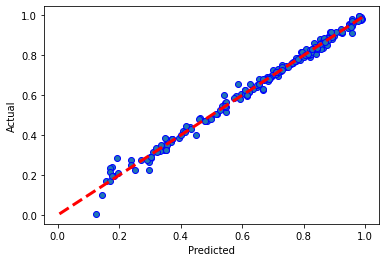

Histogram Errors :


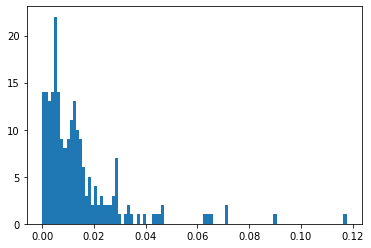

In [23]:
from lightgbm import LGBMRegressor

y = df['Inconnues']
X = df.drop("Inconnues", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1)

model = LGBMRegressor(n_jobs=5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("------------------------------------------------------")
print("R2:",r2_score(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Median Absolute Error): ", median_absolute_error(y_test, y_pred))
print("------------------------------------------------------")
print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, y_pred))
print("MAPE (Mean Absolute Percentage Error): ", mean_absolute_percentage_error(y_test, y_pred))
print("------------------------------------------------------")
print("MSE (Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=True))
print("RMSE (Root Mean Square Error): ", mean_squared_error(y_test, y_pred, squared=False))
print("------------------------------------------------------")
print("Max Error: ", max_error(y_test, y_pred))
print("------------------------------------------------------")

print("Actual vs Predicted :")
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

print("Histogram Errors :")
err_hist = np.abs(y_test - y_pred)
plt.hist(err_hist, bins=100)
plt.show()